In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
from plotly import tools
import plotly.express as px
import missingno as mno
sns.set_style("whitegrid", {"grid.color": ".2", "grid.linestyle": ":"})

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Reading dataset

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#reading data
url = 'https://docs.google.com/spreadsheets/d/1cX7Skqq5GTUNMdxSXZiZayOyxSAX1-Wz/edit?usp=sharing&ouid=110921252332342959785&rtpof=true&sd=true'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
#df = pd.read_excel(url)
url

'https://drive.google.com/uc?id=1cX7Skqq5GTUNMdxSXZiZayOyxSAX1-Wz'

In [ ]:
df.shape

(377719, 7)

In [ ]:
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


## Data Cleaning and Initial Preperation

In [ ]:
#checking for missing values

df.isna().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

There are no missing vales but columns have datatype as object when they should be floats, looking at these columns.

In [ ]:
#fuction to check if a string can be converted to float

def isfloat(x):
    try:
        float(x)
        return True
    except:
        return False

In [ ]:
cols = [col for col in df.columns if col != 'time']
for col in cols:
    x = df[col].astype(str)
    print(x[[not isfloat(k) for k in x]].value_counts())

Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Comm Fail         2
Name: Cyclone_Inlet_Gas_Temp, dtype: int64
Not Connect     723
I/O Timeout     470
Unit Down       271
Configure       108
Scan Timeout     17
Comm Fail         2
Name: Cyclone_Material_Temp, dtype: int64
Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Comm Fail         2
Unit Down         1
Name: Cyclone_Outlet_Gas_draft, dtype: int64
Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Comm Fail         2
Name: Cyclone_cone_draft, dtype: int64
Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Comm Fail         2
Unit Down         1
Name: Cyclone_Gas_Outlet_Temp, dtype: int64
Not Connect     723
I/O Timeout     470
Configure       108
Scan Timeout     17
Unit Down         2
Comm Fail         2
Name: Cyclone_Inlet_Draft, dtype: int64


In [ ]:
# replcing all the string values that are not numbers with NaN
for col in cols:
    x = df[col].astype(str)
    df[col][[not isfloat(k) for k in x]] = np.nan

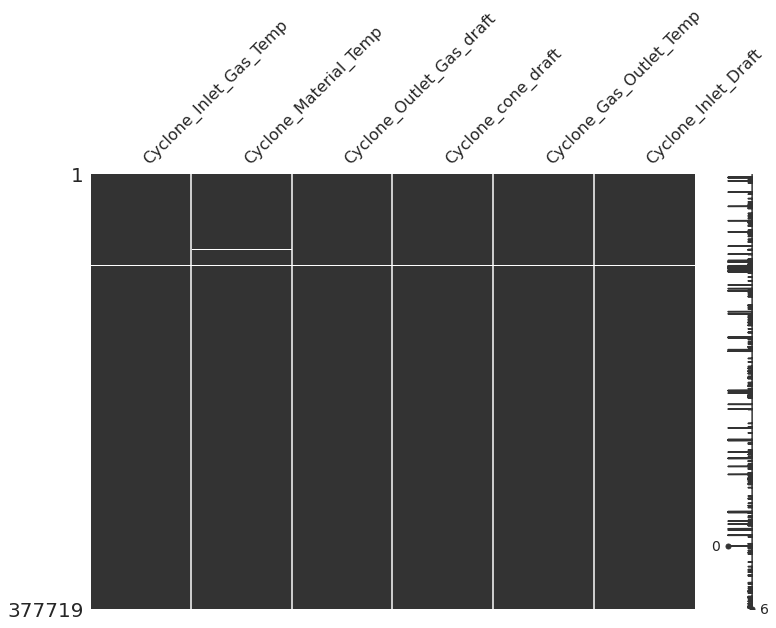

In [ ]:
#visualizing columns with missing values
missing_col = [col for col in df.columns if df[col].isna().any()]
mno.matrix(df[missing_col], color = '0.2',figsize=[12,8])



> Most missing values belong to the same records.



In [ ]:
#correcting data-types of columns

cols = [col for col in df.columns if col != 'time']
df[cols] = df[cols].astype('float64')

In [ ]:
#checking missing values

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])

,Total Missing,Percent Missing
Cyclone_Material_Temp,1591,0.42
Cyclone_Inlet_Draft,1322,0.35
Cyclone_Outlet_Gas_draft,1321,0.35
Cyclone_Gas_Outlet_Temp,1321,0.35
Cyclone_Inlet_Gas_Temp,1320,0.35
Cyclone_cone_draft,1320,0.35
time,0,0.00




> There are less than one percent missing values in every columns and most of them belong to the same records, so we can drop them.



In [ ]:
#dropping rows with missing values

df.dropna(axis = 0, inplace = True)

In [ ]:
df.shape

(376124, 7)

In [ ]:
#basic statistical description of features
df.describe()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,376124.000000,376124.000000,376124.000000,376124.000000,376124.000000,376124.000000
mean,727.387946,750.828429,-177.830733,-164.582678,715.798475,-141.309826
std,328.634044,350.922335,99.138694,90.096403,325.316433,77.609444
min,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,856.280000,867.660000,-247.190000,-226.770000,802.040000,-193.510000
50%,882.380000,913.360000,-215.260000,-198.570000,871.530000,-169.460000
75%,901.120000,943.660000,-170.150000,-143.680000,899.300000,-136.310000
max,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000


## Exploratory Data Analysis

Taking a look at distribution of all the features.

In [ ]:
#Function for visualizing distribution of numerical variables, box plot
def dist_plot(x):
    ax = sns.distplot(x = df[x], color = 'midnightblue')
    ax.set_title('{} distribution'.format(x), fontsize = 16, pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

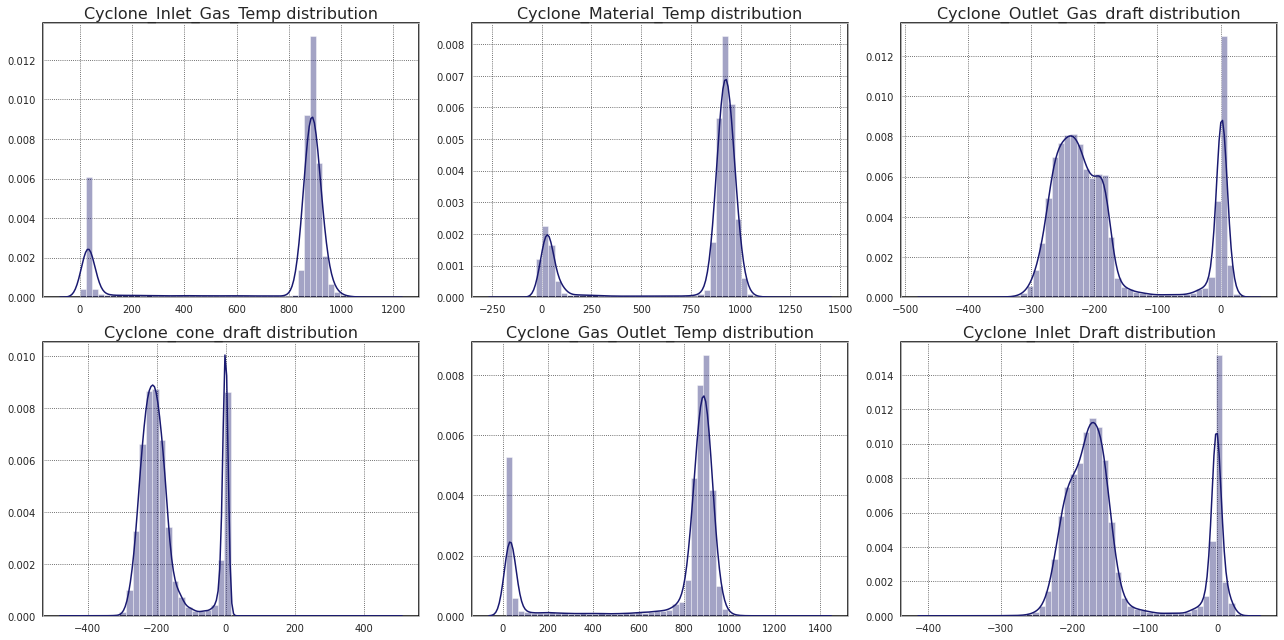

In [ ]:
plt.figure(figsize = [18,9])
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    dist_plot(cols[i])
    plt.ylabel('')
    #plt.yticks([])
plt.tight_layout()
plt.show()

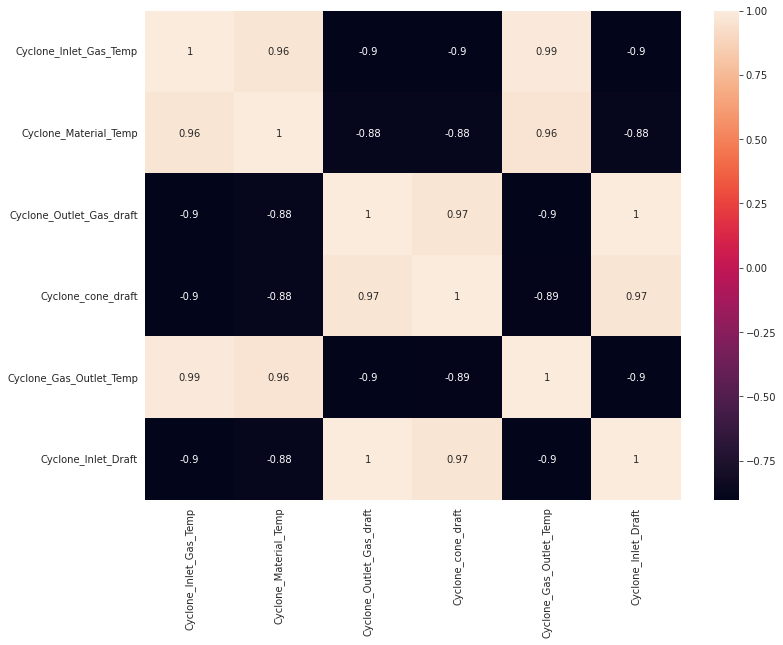

In [ ]:
plt.figure(figsize = [12, 9])
sns.heatmap(df.corr(), annot = True)

<Figure size 864x648 with 0 Axes>

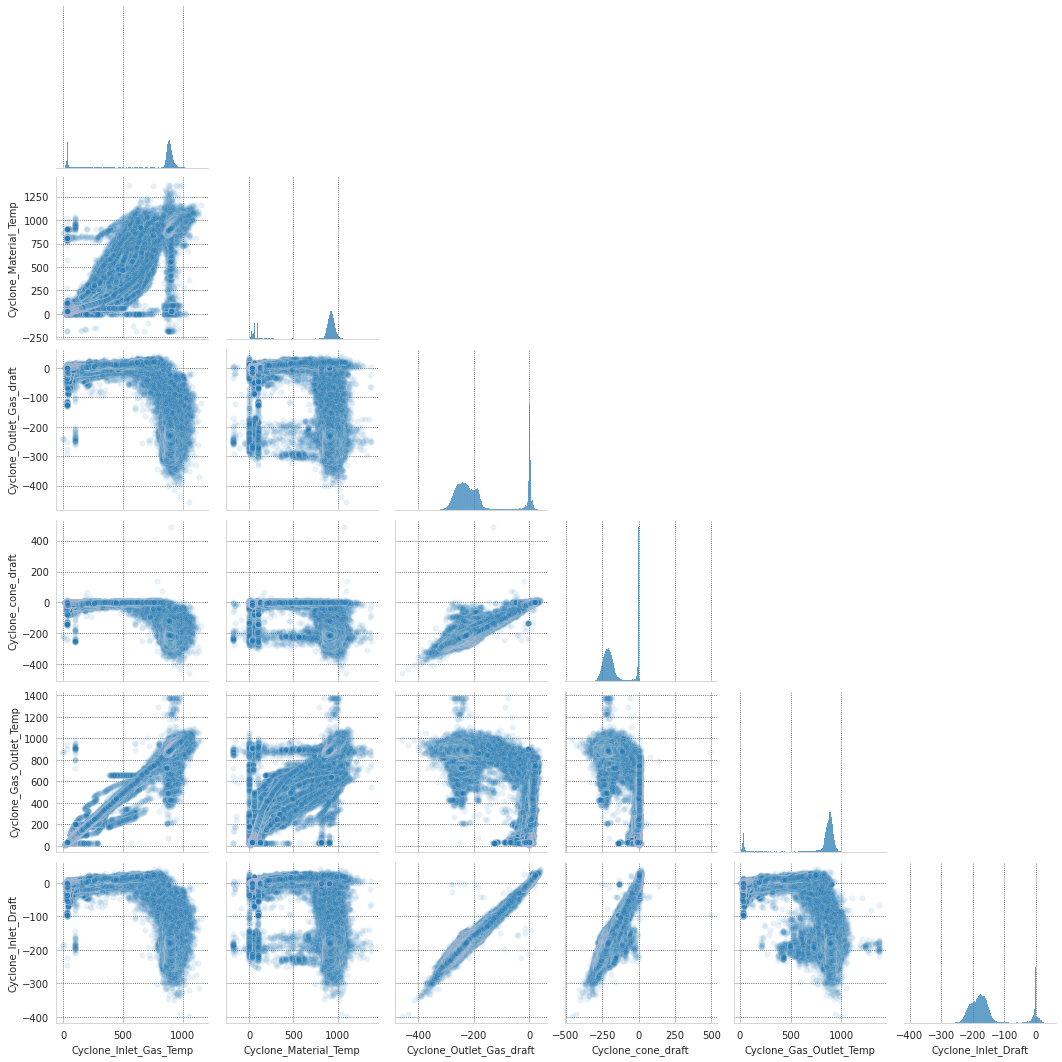

In [ ]:
plt.figure(figsize = [12, 9])
sns.pairplot(df, plot_kws={'alpha':0.1}, corner = True)

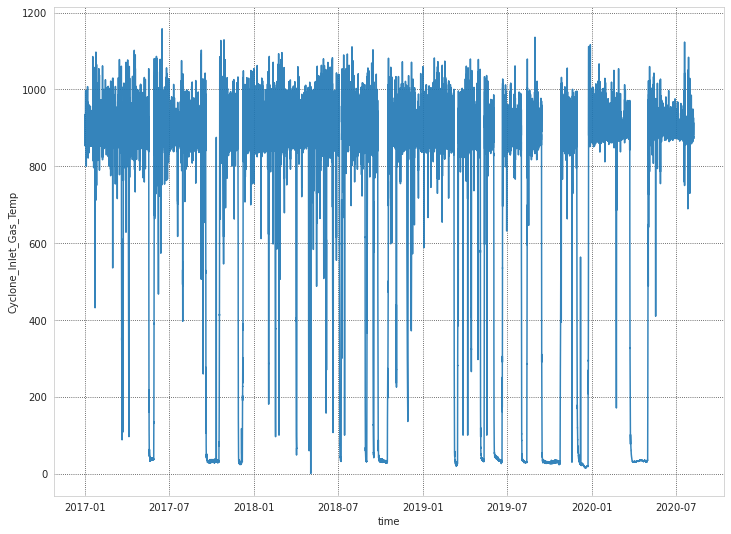

In [ ]:
plt.figure(figsize = [12, 9])
sns.lineplot(df['time'], df['Cyclone_Inlet_Gas_Temp'], alpha = 0.9)

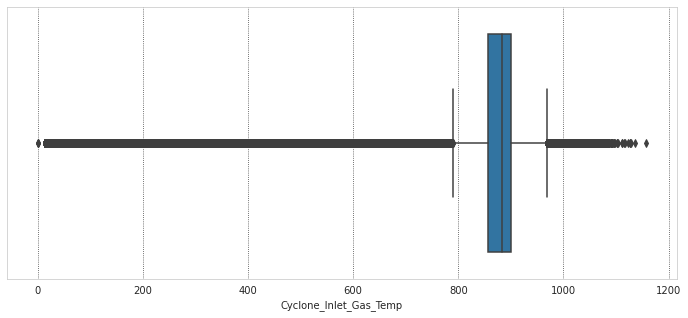

In [ ]:
plt.figure(figsize = [12,5])
sns.boxplot(df['Cyclone_Inlet_Gas_Temp'])

## Using Dimensionality Reduction (PCA)

In [ ]:
from sklearn.decomposition import PCA
X = df[cols]
pca = PCA(n_components=2)
pca.fit(X)
components = pca.transform(X)
pca_df = pd.DataFrame({'component_1': components[:,0], 'component_2': components[:,1]})
pca_df.head()

,component_1,component_2
0,-250.264915,-19.762180
1,-265.967970,-18.709848
2,-266.250757,-26.450782
3,-265.891655,-25.307936
4,-286.778619,-24.886637


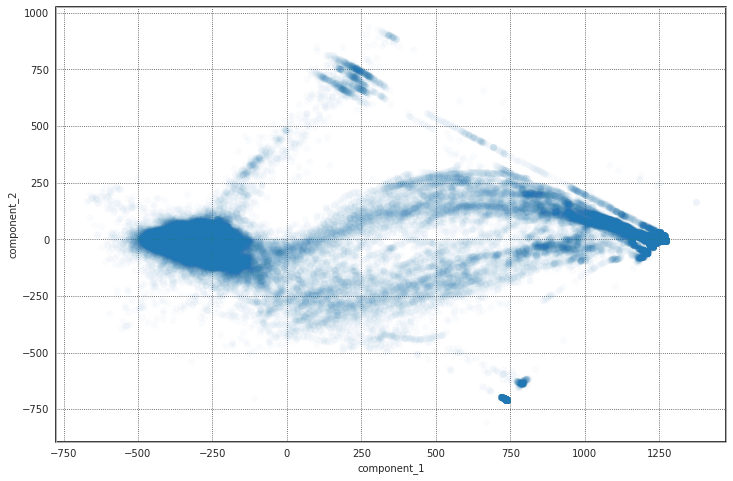

In [ ]:
plt.figure(figsize = [12, 8])
ax = sns.scatterplot(pca_df['component_1'], pca_df['component_2'], s = 50, linewidth = 0, alpha = 0.025)
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)

> Data is mostly packed in two dense regions.

## Elliptic envelope

In [ ]:
#copy of dataset

df_m = df.copy()

In [ ]:
from sklearn.covariance import EllipticEnvelope

# apply ellipticEnvelope(gaussian distribution)
X = df[cols]
outliers_fraction = 0.05
envelope =  EllipticEnvelope(contamination = outliers_fraction)
envelope.fit(X)
y = envelope.predict(X)

In [ ]:
df_m['anomaly_ee'] = pd.Series(y)
df_m['anomaly_ee'].value_counts()

 1.0    355773
-1.0     18758
Name: anomaly_ee, dtype: int64

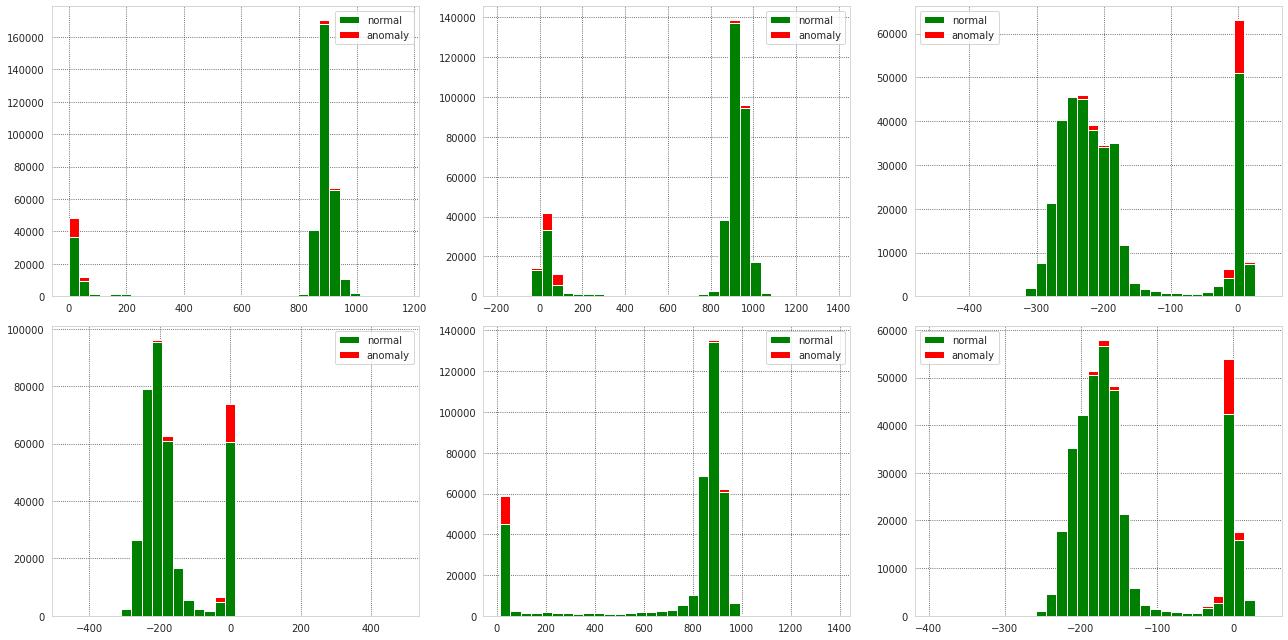

In [ ]:
#visualizing distribution normal and anomaly for all features
plt.figure(figsize = [18,9])

for i in range(len(cols)):
    a = df_m.loc[df_m['anomaly_ee'] == 1, cols[i]]
    b = df_m.loc[df_m['anomaly_ee'] == -1, cols[i]]

    plt.subplot(2,3,i+1)
    plt.hist([a,b], bins=32, stacked=True, color=['green', 'red'], label=['normal', 'anomaly'])
    plt.legend()

plt.tight_layout()
plt.show()

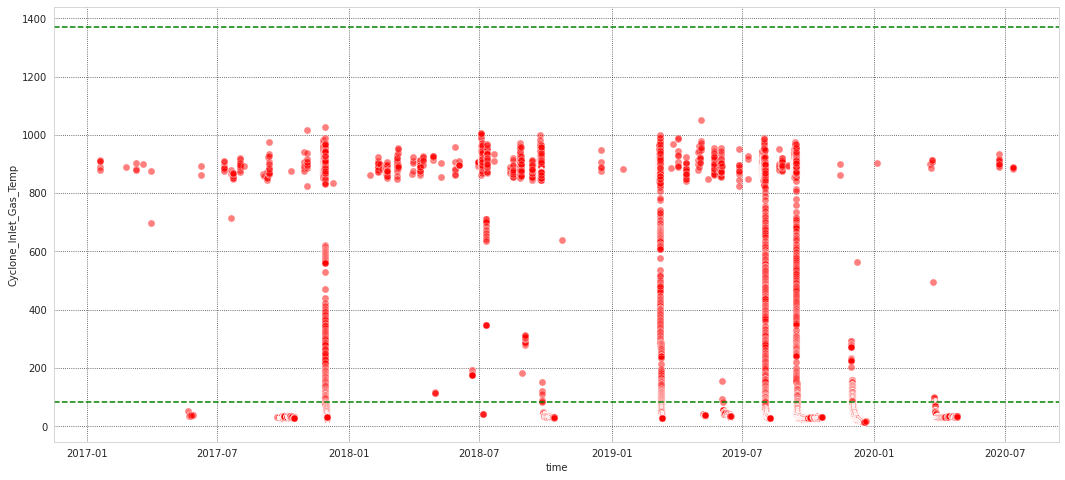

In [ ]:
col = 'Cyclone_Inlet_Gas_Temp'      #column name
a = df_m[['time', col]]
b = df_m.loc[df_m['anomaly_ee'] == -1, ['time', col]]

plt.figure(figsize = [18, 8])
#sns.lineplot(a['time'], a[col], alpha = 0.9)
sns.scatterplot(b['time'], b[col], s = 50, color = 'red', alpha = 0.5)
plt.axhline((df_m[col].mean() - 1.960 * df_m[col].std()), ls="--", c="g")
plt.axhline((df_m[col].mean() + 1.960 * df_m[col].std()), ls="--", c="g")
plt.show()

In [ ]:
x = b.copy()
x['year'] = pd.DatetimeIndex(b.time).year
x['month'] = pd.DatetimeIndex(b.time).month
hm = x.groupby(['year', 'month']).time.count().unstack()

fig = px.imshow(hm, title = 'Number of Of Anomalies',
                color_continuous_scale='Reds')

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 2017,
        dtick = 1
    )
)
fig.update_layout(
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

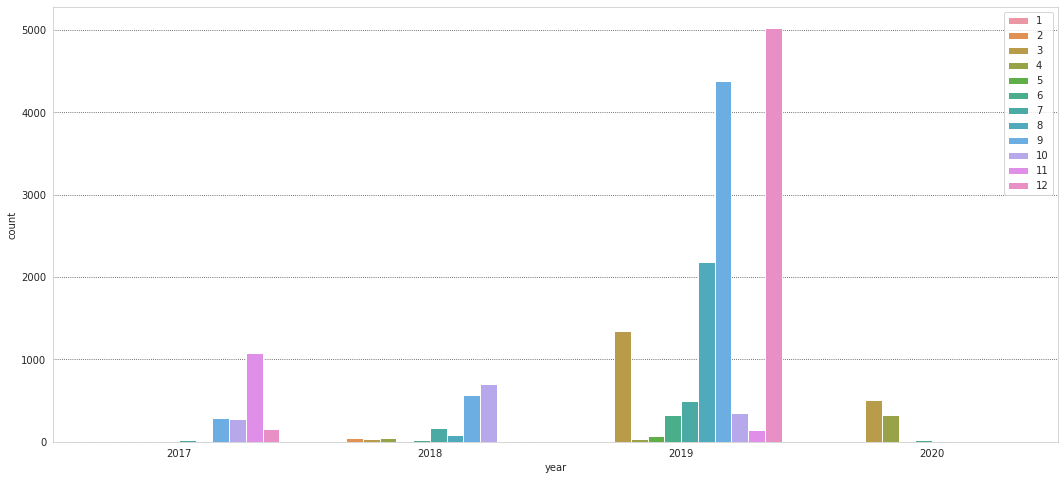

In [ ]:
plt.figure(figsize = [18, 8])
sns.countplot(x = x['year'], hue = x['month'])
plt.legend(loc = 'upper right')

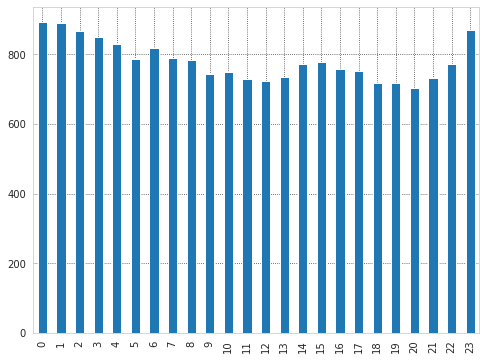

In [ ]:
pd.DatetimeIndex(b.time).hour.value_counts().sort_index().plot(kind = 'bar', figsize = [8,6])

## Using Tolerance Interval

tolerance limits are given by x_mean ± ks, where k is determined
such that one can assert with 100(1 − γ)% confidence that the given
limits contain at least the proportion 1 − α of the measurements.

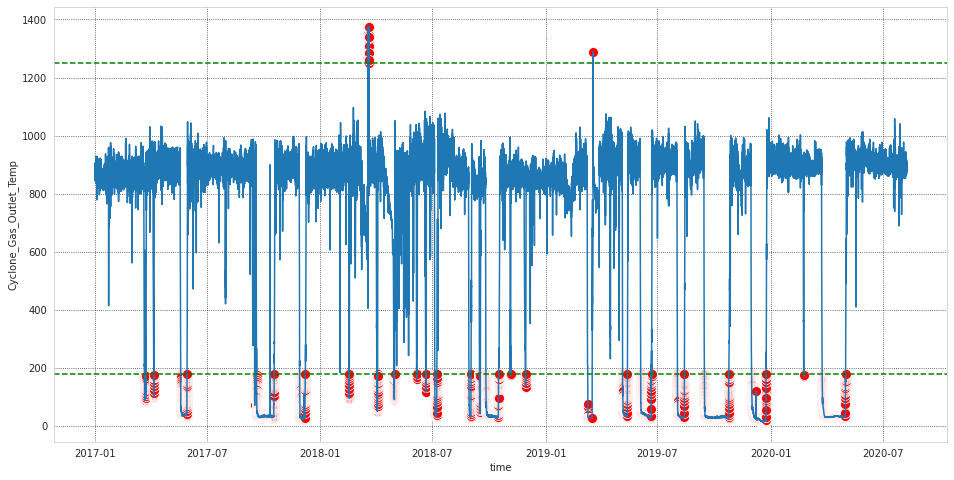

In [ ]:
#an example of how tolerance limits would work for k = 1.645
col = 'Cyclone_Gas_Outlet_Temp'
b = df_m.loc[(df_m[col] < df_m[col].mean() - 1.645 * df_m[col].std()) | (df_m[col] > df_m[col].mean() + 1.645 * df_m[col].std()), ['time', col]]

plt.figure(figsize = [16, 8])
sns.lineplot(df_m['time'], df_m[col])
sns.scatterplot(b['time'], b[col], s = 100, color = 'red')
plt.axhline((df_m[col].mean() - 1.645 * df_m[col].std()), ls="--", c="g")
plt.axhline((df_m[col].mean() + 1.645 * df_m[col].std()), ls="--", c="g")
plt.show()

In [ ]:
# median, mean and std
df[cols].agg([np.median, np.mean, np.std]).round(2)

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
median,882.38,913.36,-215.26,-198.57,871.53,-169.46
mean,727.39,750.83,-177.83,-164.58,715.80,-141.31
std,328.63,350.92,99.14,90.10,325.32,77.61


Tolerance Factors
* γ = 0.01
* 1 - α = 0.95

For a large sample, tolerance limits are quite-simply, **x_mean ± Z*σ**.

P = 95 %,  Z = 1.960

In [ ]:
#setting anomaly as 1(normal)
df_m['anomaly_tol'] = 1

#abnormalities
for col in cols:
    mn = df_m[col].mean()
    std = df_m[col].std()
    df_m.loc[(df_m[col] < mn - 1.96 * std) | (df_m[col] > mn + 1.96 * std), 'anomaly_tol'] = -1

df_m['anomaly_tol'].value_counts()

 1    304932
-1     71192
Name: anomaly_tol, dtype: int64

In [ ]:
df_m.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,anomaly_ee,anomaly_tol
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1.0,1
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1.0,1
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1.0,1
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1.0,1
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1.0,1


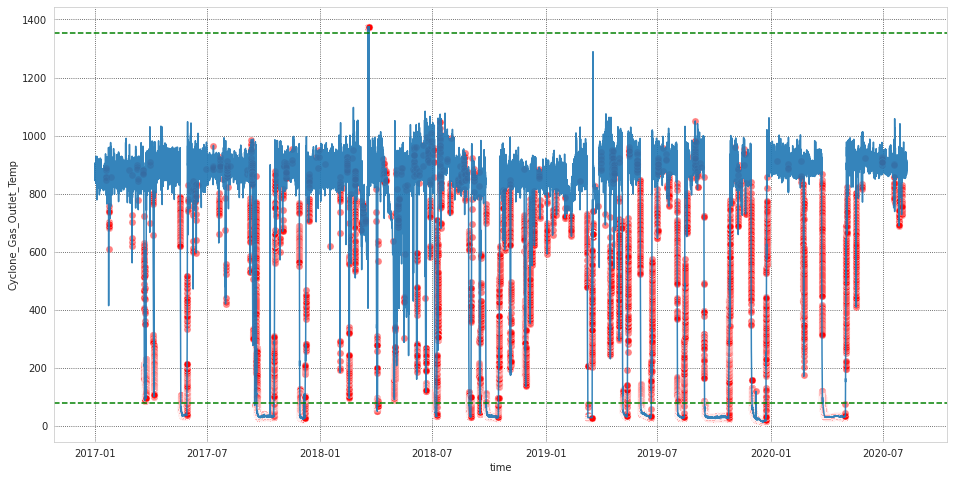

In [ ]:
col = 'Cyclone_Gas_Outlet_Temp'      #column name
a = df_m[['time', col]]
b = df_m.loc[df_m['anomaly_tol'] == -1, ['time', col]]

plt.figure(figsize = [16, 8])
sns.lineplot(a['time'], a[col], alpha = 0.9)
sns.scatterplot(b['time'], b[col], s = 50, color = 'red', alpha = 0.5)
plt.axhline((df_m[col].mean() - 1.960 * df_m[col].std()), ls="--", c="g")
plt.axhline((df_m[col].mean() + 1.960 * df_m[col].std()), ls="--", c="g")
plt.show()

In [ ]:
x = b.copy()
x['year'] = pd.DatetimeIndex(b.time).year
x['month'] = pd.DatetimeIndex(b.time).month
hm = x.groupby(['year', 'month']).time.count().unstack()

fig = px.imshow(hm, title = 'Number of Of Anomalies',
                color_continuous_scale='Reds')

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 2017,
        dtick = 1
    ),
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

In [ ]:
x.year.value_counts()

2019    33384
2017    14637
2020    11716
2018    11455
Name: year, dtype: int64

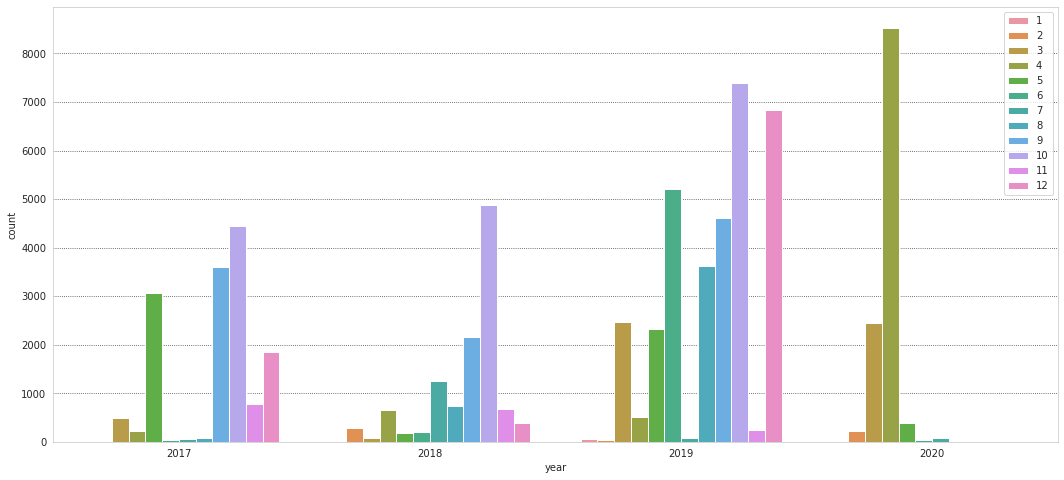

In [ ]:
plt.figure(figsize = [18, 8])
sns.countplot(x = x['year'], hue = x['month'])
plt.legend(loc = 'upper right')

## Isolation Forrest

In [ ]:
from sklearn.ensemble import IsolationForest

X = df[cols]
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])

outliers_fraction = 0.05

# train isolation forest
model =  IsolationForest(contamination = outliers_fraction, n_jobs=-1)
model.fit(X)

# add the data to the df_m
df_m['anomaly_if'] = pd.Series(model.predict(X))
df_m['anomaly_if'] = df_m['anomaly_if']

df_m['anomaly_if'].value_counts()

 1.0    355779
-1.0     18752
Name: anomaly_if, dtype: int64

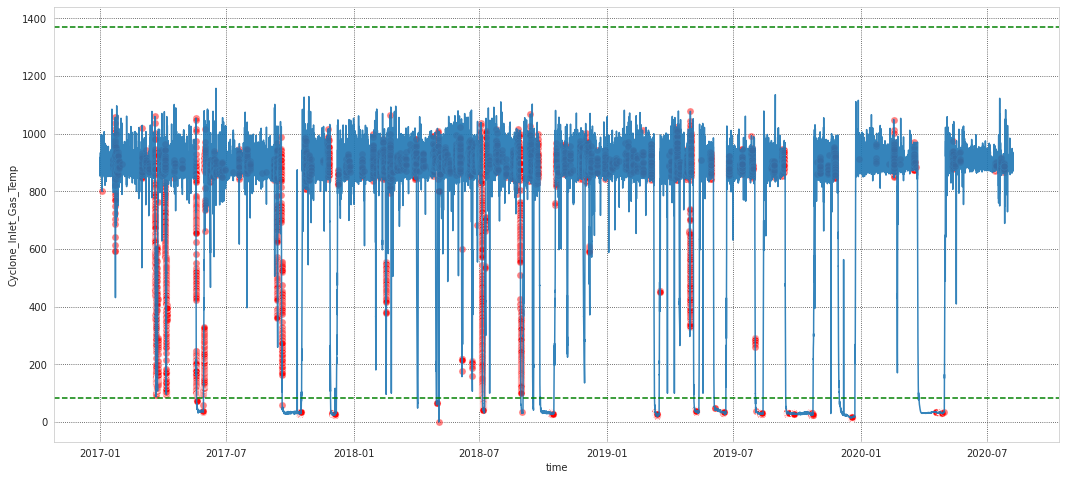

In [ ]:
col = 'Cyclone_Inlet_Gas_Temp'      #column name
a = df_m[['time', col]]
b = df_m.loc[df_m['anomaly_if'] == -1, ['time', col]]

plt.figure(figsize = [18, 8])
sns.lineplot(a['time'], a[col], alpha = 0.9)
sns.scatterplot(b['time'], b[col], s = 50, color = 'red', alpha = 0.5)
plt.axhline((df_m[col].mean() - 1.960 * df_m[col].std()), ls="--", c="g")
plt.axhline((df_m[col].mean() + 1.960 * df_m[col].std()), ls="--", c="g")
plt.show()

In [ ]:
x = b.copy()
x['year'] = pd.DatetimeIndex(b.time).year
x['month'] = pd.DatetimeIndex(b.time).month
hm = x.groupby(['year', 'month']).time.count().unstack()

fig = px.imshow(hm, title = 'Number of Of Anomalies',
                color_continuous_scale='Reds')

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 2017,
        dtick = 1
    )
)
fig.update_layout(
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

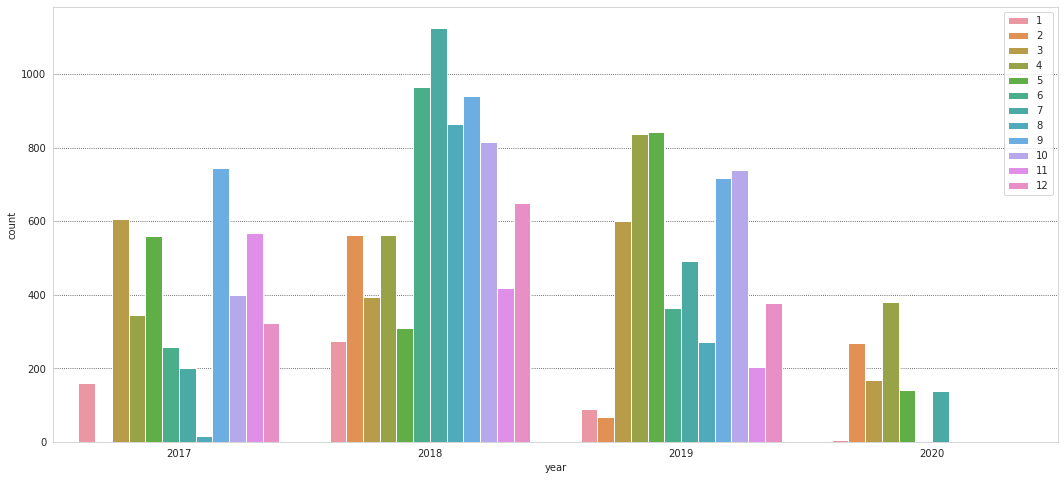

In [ ]:
plt.figure(figsize = [18, 8])
sns.countplot(x = x['year'], hue = x['month'])
plt.legend(loc = 'upper right')

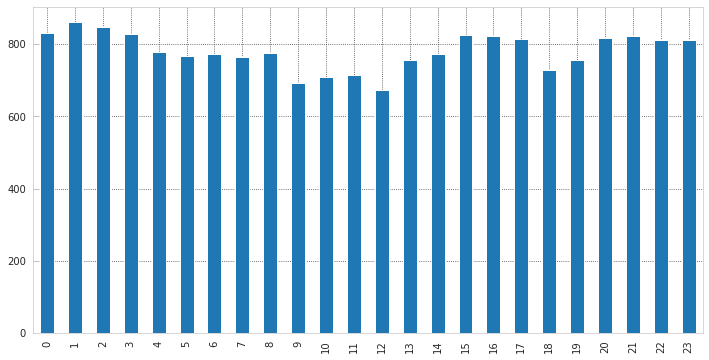

In [ ]:
pd.DatetimeIndex(b.time).hour.value_counts().sort_index().plot(kind = 'bar', figsize = [12,6])

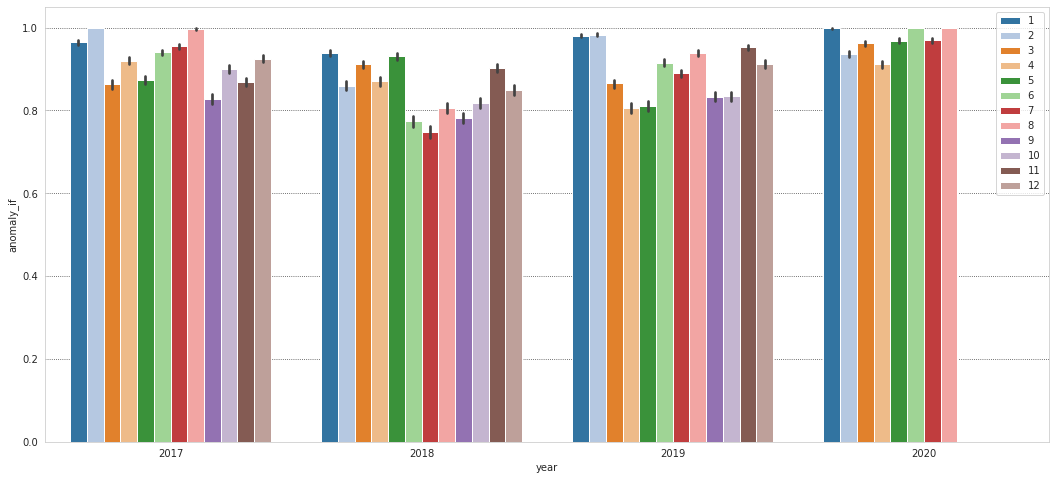

In [ ]:
plt.figure(figsize = [18, 8])

df_m['year'] = pd.DatetimeIndex(df_m.time).year
df_m['month'] = pd.DatetimeIndex(df_m.time).month
df_m['hour'] = pd.DatetimeIndex(df_m.time).hour
df_m['day'] = pd.DatetimeIndex(df_m.time).day
df_m['weekday'] = pd.DatetimeIndex(df_m.time).weekday
#df_m.groupby(['year', 'month']).anomaly_lof.mean()

sns.barplot(x = df_m['year'], y = df_m['anomaly_if'], hue = df_m['month'], estimator=np.mean, palette='tab20')
plt.legend(loc = 'upper right')

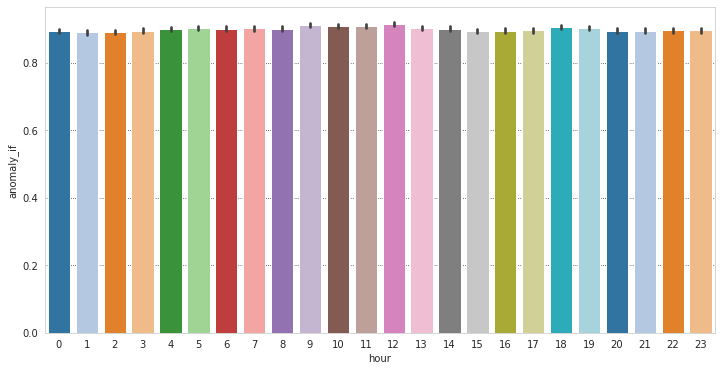

In [ ]:
plt.figure(figsize = [12, 6])
sns.barplot(x = df_m['hour'], y = df_m['anomaly_if'], estimator=np.mean, palette='tab20')

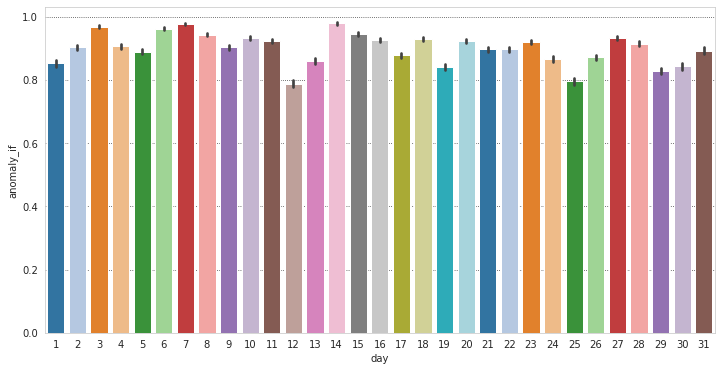

In [ ]:
plt.figure(figsize = [12, 6])
sns.barplot(x = df_m['day'], y = df_m['anomaly_if'], estimator=np.mean, palette='tab20')

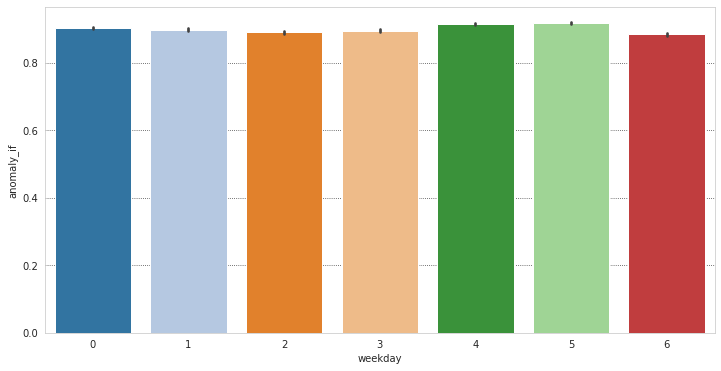

In [ ]:
plt.figure(figsize = [12, 6])
sns.barplot(x = df_m['weekday'], y = df_m['anomaly_if'], estimator=np.mean, palette='tab20')

## Local Outlier Factor (LOF)

In [ ]:
from sklearn.ensemble import IsolationForest

X = df[cols]
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])

outliers_fraction = 0.05

# train isolation forest
model =  LocalOutlierFactor(n_neighbors=100, contamination = outliers_fraction, n_jobs = -1)
#model.fit(X)

# add the data to the df_m
df_m['anomaly_lof'] = pd.Series(model.fit_predict(X))
df_m['anomaly_lof'] = df_m['anomaly_lof']

df_m['anomaly_lof'].value_counts()

 1.0    355810
-1.0     18721
Name: anomaly_lof, dtype: int64

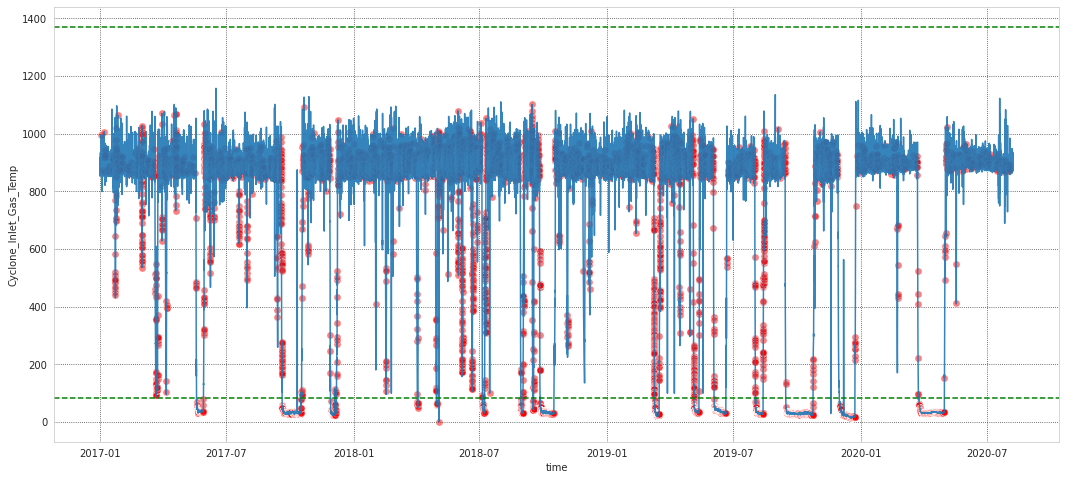

In [ ]:
col = 'Cyclone_Inlet_Gas_Temp'      #column name
a = df_m[['time', col]]
b = df_m.loc[df_m['anomaly_lof'] == -1, ['time', col]]

plt.figure(figsize = [18, 8])
sns.lineplot(a['time'], a[col], alpha = 0.9)
sns.scatterplot(b['time'], b[col], s = 50, color = 'red', alpha = 0.5)
plt.axhline((df_m[col].mean() - 1.960 * df_m[col].std()), ls="--", c="g")
plt.axhline((df_m[col].mean() + 1.960 * df_m[col].std()), ls="--", c="g")
plt.show()

In [ ]:
x = b.copy()
x['year'] = pd.DatetimeIndex(b.time).year
x['month'] = pd.DatetimeIndex(b.time).month
hm = x.groupby(['year', 'month']).time.count().unstack()

fig = px.imshow(hm, title = 'Number of Of Anomalies',
                color_continuous_scale='Reds')

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 2017,
        dtick = 1
    ),
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

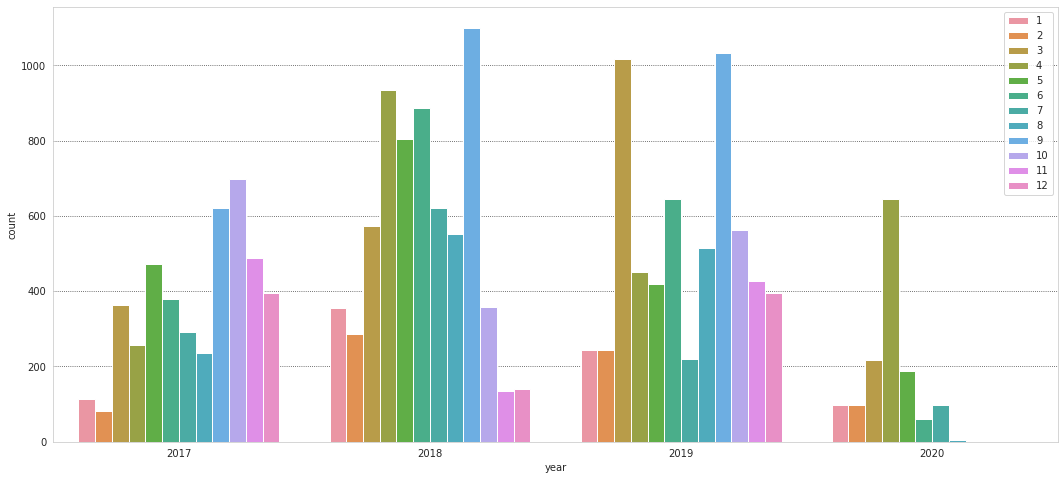

In [ ]:
plt.figure(figsize = [18, 8])
sns.countplot(x = x['year'], hue = x['month'])
plt.legend(loc = 'upper right')

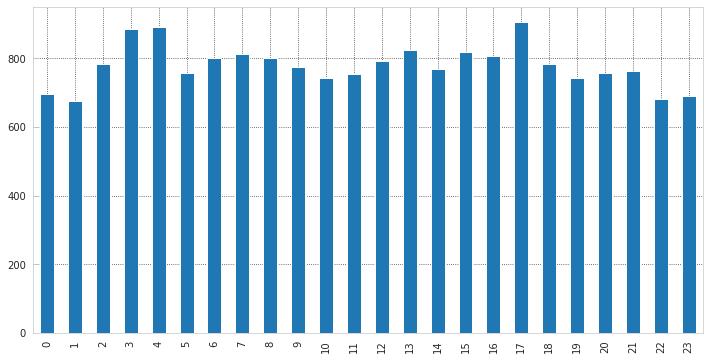

In [ ]:
pd.DatetimeIndex(b.time).hour.value_counts().sort_index().plot(kind = 'bar', figsize = [12,6])

## SGD One-Class SVM (kernel : Linear)

In [ ]:
X = df[cols]
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])

outliers_fraction = 0.05

# train isolation forest
model =  SGDOneClassSVM(nu = outliers_fraction, max_iter=10000, random_state = 18)
#model.fit(X)

# add the data to the df_m
df_m['anomaly_svm'] = pd.Series(model.fit_predict(X))
df_m['anomaly_svm'] = df_m['anomaly_svm']

df_m['anomaly_svm'].value_counts()

 1.0    360620
-1.0     13911
Name: anomaly_svm, dtype: int64

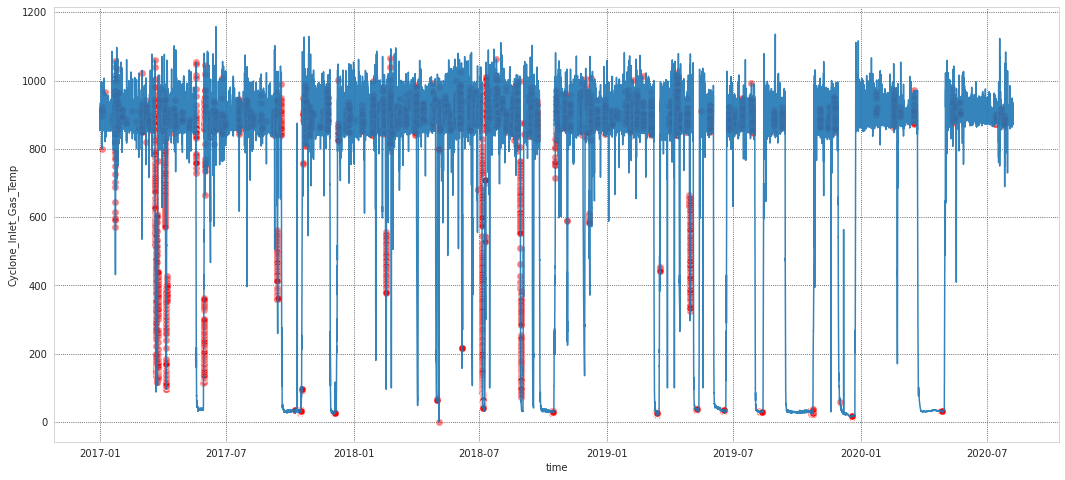

In [ ]:
col = 'Cyclone_Inlet_Gas_Temp'      #column name
a = df_m[['time', col]]
b = df_m.loc[df_m['anomaly_svm'] == -1, ['time', col]]

plt.figure(figsize = [18, 8])
sns.lineplot(a['time'], a[col], alpha = 0.9)
sns.scatterplot(b['time'], b[col], s = 50, color = 'red', alpha = 0.5)
plt.show()

In [ ]:
x = b.copy()
x['year'] = pd.DatetimeIndex(b.time).year
x['month'] = pd.DatetimeIndex(b.time).month
hm = x.groupby(['year', 'month']).time.count().unstack()

fig = px.imshow(hm, title = 'Number of Of Anomalies',
                color_continuous_scale='Reds')

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 2017,
        dtick = 1
    ),
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

In [ ]:
x.year.value_counts()

2018    5356
2019    4111
2017    3365
2020    1079
Name: year, dtype: int64

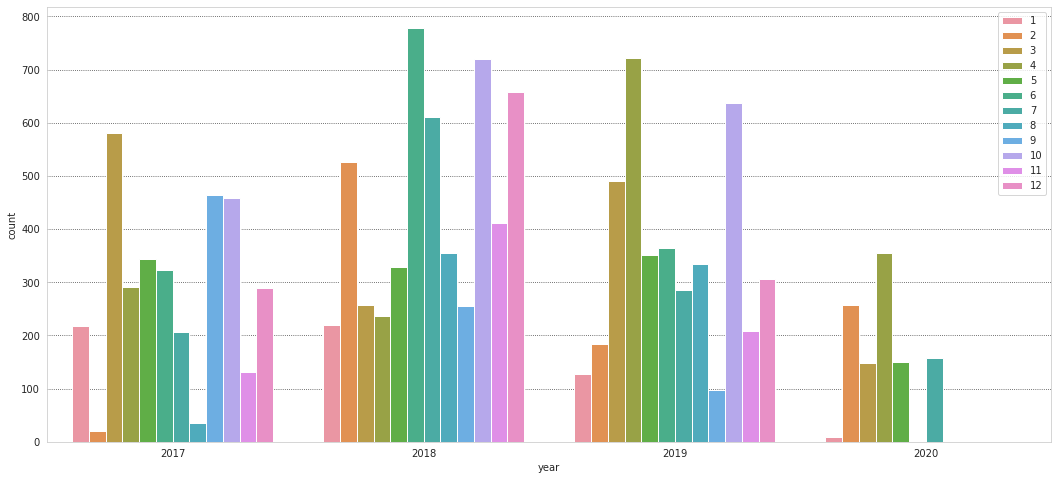

In [ ]:
plt.figure(figsize = [18, 8])
sns.countplot(x = x['year'], hue = x['month'])
plt.legend(loc = 'upper right')

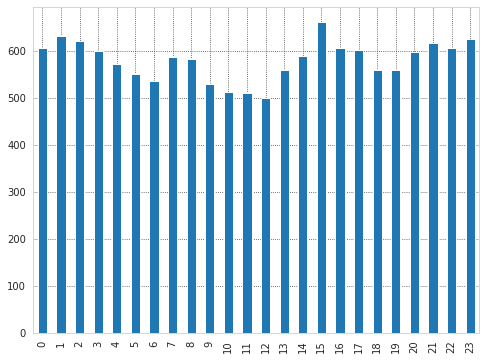

In [ ]:
pd.DatetimeIndex(b.time).hour.value_counts().sort_index().plot(kind = 'bar', figsize = [8,6])

In [ ]:
pd.DatetimeIndex(b.time).weekday.value_counts()

6    2418
3    2276
0    2132
2    2080
1    1813
4    1790
5    1402
Name: time, dtype: int64

## Visualizing Abnormalities

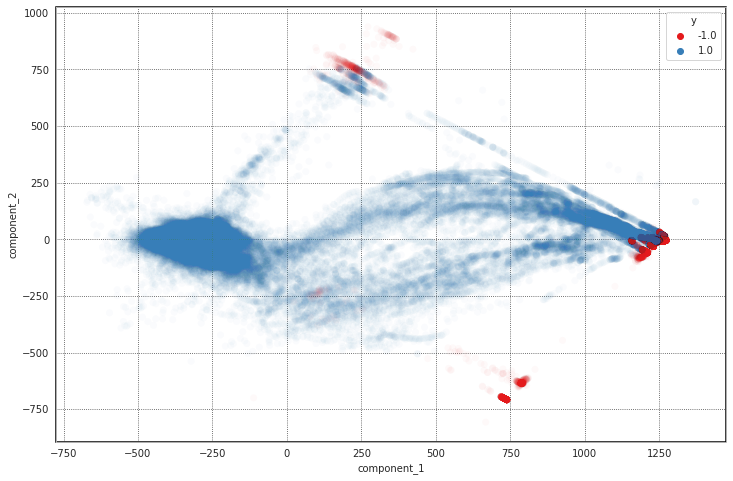

In [ ]:
pca_df['y'] = df_m['anomaly_ee']

plt.figure(figsize = [12, 8])
ax = sns.scatterplot(pca_df['component_1'], pca_df['component_2'], hue = pca_df['y'], s = 50, linewidth = 0, alpha = 0.025, palette = 'Set1')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)

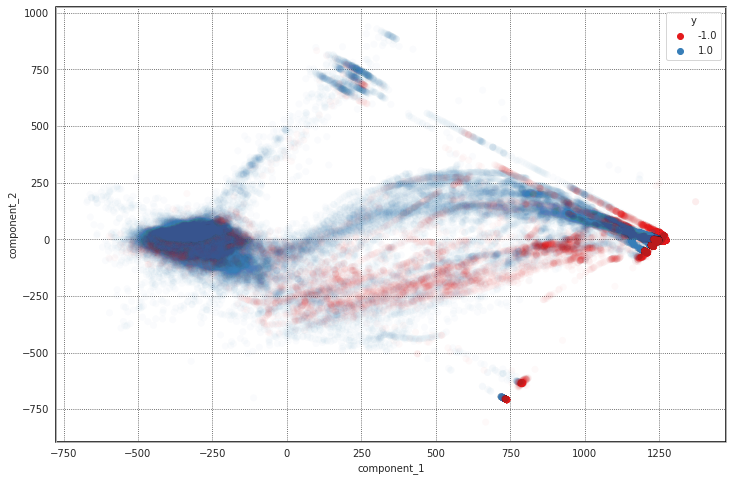

In [ ]:
pca_df['y'] = df_m['anomaly_tol']

plt.figure(figsize = [12, 8])
ax = sns.scatterplot(pca_df['component_1'], pca_df['component_2'], hue = pca_df['y'], s = 50, linewidth = 0, alpha = 0.025, palette = 'Set1')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)

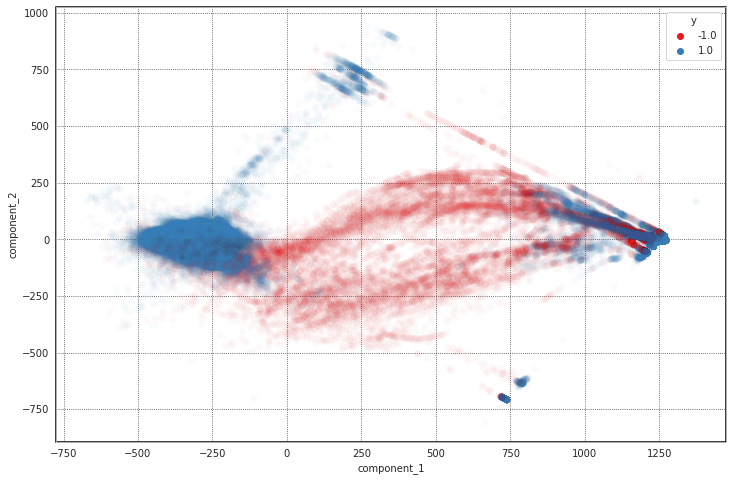

In [ ]:
pca_df['y'] = df_m['anomaly_if']

plt.figure(figsize = [12, 8])
ax = sns.scatterplot(pca_df['component_1'], pca_df['component_2'], hue = pca_df['y'], s = 50, linewidth = 0, alpha = 0.025, palette = 'Set1')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)
plt.show()

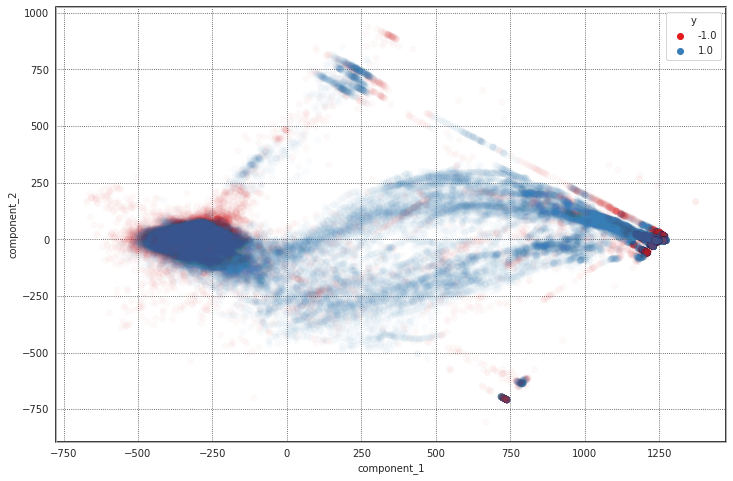

In [ ]:
pca_df['y'] = df_m['anomaly_lof']

plt.figure(figsize = [12, 8])
ax = sns.scatterplot(pca_df['component_1'], pca_df['component_2'], hue = pca_df['y'], s = 50, linewidth = 0, alpha = 0.025, palette = 'Set1')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)

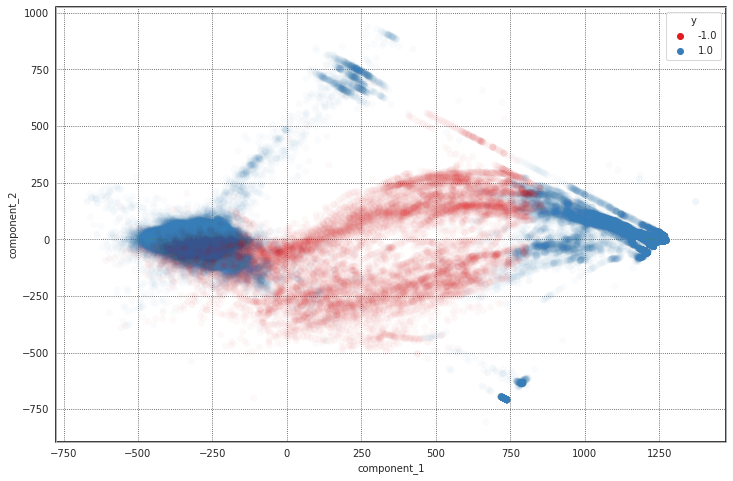

In [ ]:
pca_df['y'] = df_m['anomaly_svm']

plt.figure(figsize = [12, 8])
ax = sns.scatterplot(pca_df['component_1'], pca_df['component_2'], hue = pca_df['y'], s = 50, linewidth = 0, alpha = 0.025, palette = 'Set1')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
df_mm = df_m.copy()
df_mm = df_mm.sample(frac = 0.1)
X = df_mm[cols]
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])

dbscan = DBSCAN(eps = 0.1, min_samples = 8, n_jobs = -1)
dbscan.fit(X)

# add the data to the df_m
df_mm['anomaly_db'] = dbscan.labels_
df_mm.loc[df_mm['anomaly_db'] != -1, 'anomaly_db'] = 1
df_mm['anomaly_db'].value_counts()

 1    31171
-1     6441
Name: anomaly_db, dtype: int64

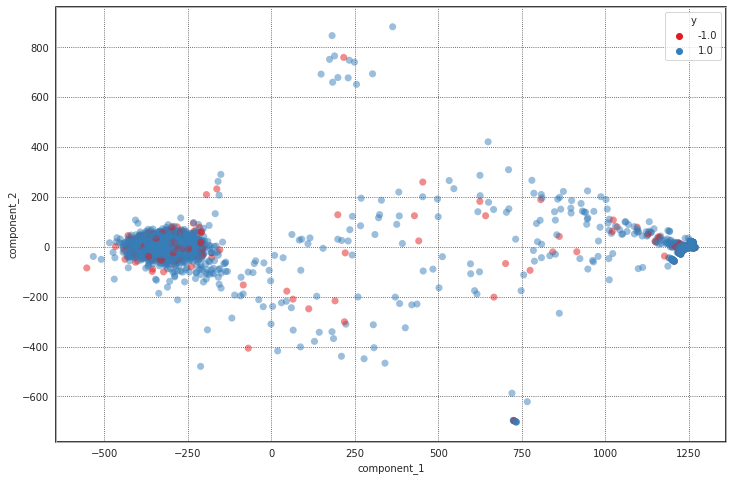

In [ ]:
X = df_mm[cols]
pca = PCA(n_components=2)
pca.fit(X)
components = pca.transform(X)
pca_df1 = pd.DataFrame({'component_1': components[:,0], 'component_2': components[:,1]})

pca_df1['y'] = df_mm['anomaly_db']

plt.figure(figsize = [12, 8])
ax = sns.scatterplot(pca_df1['component_1'], pca_df1['component_2'], hue = pca_df1['y'], s = 50, linewidth = 0, alpha = 0.5, palette = 'Set1')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)